### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,f1_score
from sklearn.cluster import AgglomerativeClustering,KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
train=pd.read_csv("C://Users//Aditya//Desktop//greatlearning//ML//House//train.csv")

In [3]:
test=pd.read_csv("C://Users//Aditya//Desktop//greatlearning//ML//House//test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Filling the Missing Values

In [10]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [11]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [12]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
train.LotFrontage.fillna(value = 70,inplace = True )

In [14]:
test.LotFrontage.describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [15]:
test.LotFrontage.fillna(value = 68,inplace = True )

In [16]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
train.Alley.fillna(value = 'Grvl',inplace = True)

In [18]:
test.Alley.value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [19]:
test.Alley.fillna(value = 'Grvl',inplace = True)

In [20]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [21]:
train.FireplaceQu.fillna(value = 'Gd',inplace = True)

In [22]:
test.FireplaceQu.value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [23]:
test.FireplaceQu.fillna(value = 'Gd',inplace = True)

In [24]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
train.MasVnrType.fillna(value='None', inplace = True)

In [26]:
test.MasVnrType.value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [27]:
test.MasVnrType.fillna(value='None', inplace = True)

In [28]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
train.MasVnrArea.fillna(value=0, inplace = True)

In [30]:
test.MasVnrArea.fillna(value=0, inplace = True)

In [31]:
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [32]:
train.GarageFinish.fillna(value="Unf",inplace=True)


In [33]:
train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [34]:
train.GarageQual.fillna(value="TA",inplace=True)

In [35]:
train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [36]:
train.MiscFeature.fillna(value="Shed",inplace=True)

In [37]:
train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [38]:
train.BsmtQual.fillna(value="TA",inplace=True)

In [39]:
train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [40]:
train.BsmtCond.fillna(value="TA",inplace=True)

In [41]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [42]:
train.BsmtExposure.fillna(value="No",inplace=True)

In [43]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [44]:
train.BsmtFinType1.fillna(value="Unf",inplace=True)

In [45]:
train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [46]:
train.BsmtFinType2.fillna(value="Unf",inplace=True)

In [47]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [48]:
train.Electrical.fillna(value="SBrkr",inplace=True)

In [49]:
train.FireplaceQu.value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [50]:
train.FireplaceQu.fillna(value="Gd",inplace=True)

In [51]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [52]:
train.GarageType.fillna(value="Attchd",inplace=True)

In [53]:
train.GarageYrBlt.fillna(value=2005,inplace=True)

In [54]:
train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [55]:
train.GarageCond.fillna(value="TA",inplace=True)

In [56]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [57]:
train.PoolQC.fillna(value="Gd",inplace=True)

In [58]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [59]:
train.Fence.fillna(value="MnPrv",inplace=True)

In [60]:
test.BsmtQual.value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [61]:
test.BsmtQual.fillna(value="TA",inplace=True)

In [62]:
test.BsmtCond.value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [63]:
test.BsmtCond.fillna(value="TA",inplace=True)

In [64]:
test.BsmtExposure.value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [65]:
test.BsmtExposure.fillna(value="No",inplace=True)

In [66]:
test.BsmtFinType1.value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [67]:
test.BsmtFinType1.fillna(value="Unf",inplace=True)

In [68]:
test.BsmtFinType2.value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [69]:
test.BsmtFinType2.fillna(value="Unf",inplace=True)

In [70]:
test.FireplaceQu.value_counts()

Gd    1094
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64

In [71]:
test.FireplaceQu.fillna(value="Gd",inplace=True)

In [72]:
test.GarageType.value_counts()

Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64

In [73]:
test.GarageType.fillna(value="Attchd",inplace=True)

In [74]:
test.GarageYrBlt.fillna(value=2005,inplace=True)

In [75]:
test.Functional.value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [76]:
test.Functional.fillna("Typ",inplace=True)

In [77]:
test.BsmtFinSF2.describe()

count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [78]:
test.BsmtFinSF2.fillna(0,inplace=True)

In [79]:
test.BsmtUnfSF.fillna(460,inplace=True)

In [80]:
test.BsmtFullBath.fillna(0,inplace=True)

In [81]:
test.Exterior2nd.value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [82]:
test.Exterior2nd.fillna("VinylSd",inplace=True)

In [83]:
test.GarageCars.fillna(2,inplace=True)

In [84]:
test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [85]:
test.MSZoning.fillna("RL",inplace=True)

In [86]:
test.GarageArea.fillna(480,inplace=True)

In [87]:
test.GarageQual.value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [88]:
test.GarageQual.fillna(value="TA",inplace=True)

In [89]:
test.GarageFinish.value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [90]:
test.GarageFinish.fillna(value="Unf",inplace=True)

In [91]:
test.isnull().sum()[test.isnull().sum()>0]

Utilities          2
Exterior1st        1
BsmtFinSF1         1
TotalBsmtSF        1
BsmtHalfBath       2
KitchenQual        1
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [92]:
test.BsmtHalfBath.value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [93]:
test.BsmtHalfBath.fillna(value=0,inplace=True)

In [94]:
test.MiscFeature.value_counts()

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [95]:
test.MiscFeature.fillna(value="Shed",inplace=True)

In [96]:
test.PoolQC.value_counts()

Ex    2
Gd    1
Name: PoolQC, dtype: int64

In [97]:
test.PoolQC.fillna(value="Ex",inplace=True)

In [98]:
test.Fence.value_counts()

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [99]:
test.Fence.fillna(value="MnPrv",inplace=True)

In [100]:
test.GarageCond.fillna(value="TA",inplace=True)

In [101]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [102]:
test.BsmtFinSF1.describe()

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

In [103]:
test.BsmtFinSF1.fillna(350,inplace=True)

In [104]:
test.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [105]:
test.Exterior1st.fillna("VinylSd",inplace=True)

In [106]:
test.SaleType.fillna("WD",inplace=True)

In [107]:
test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [108]:
test.Utilities.fillna(value="AllPub",inplace=True)

In [109]:
test.TotalBsmtSF.fillna(988,inplace=True)

In [110]:
test.KitchenQual.fillna("TA",inplace=True)

### EDA

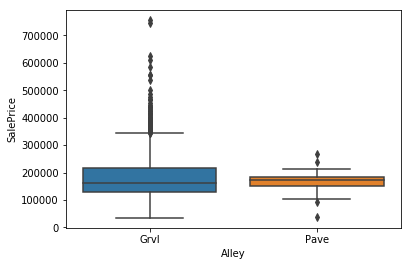

In [111]:
sns.boxplot(x = "Alley", y = "SalePrice", data = train)

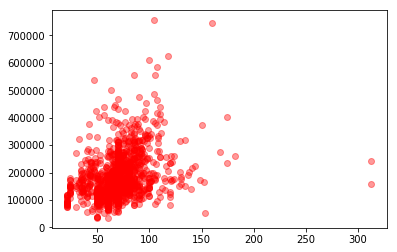

In [112]:
plt.scatter(train.LotFrontage,train.SalePrice,color="red",alpha=0.4)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


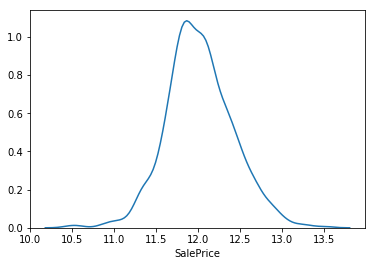

In [113]:
sns.distplot(np.log(train.SalePrice),hist=False)

In [114]:
a=train.corr()
b=a.drop("Id",axis=1)

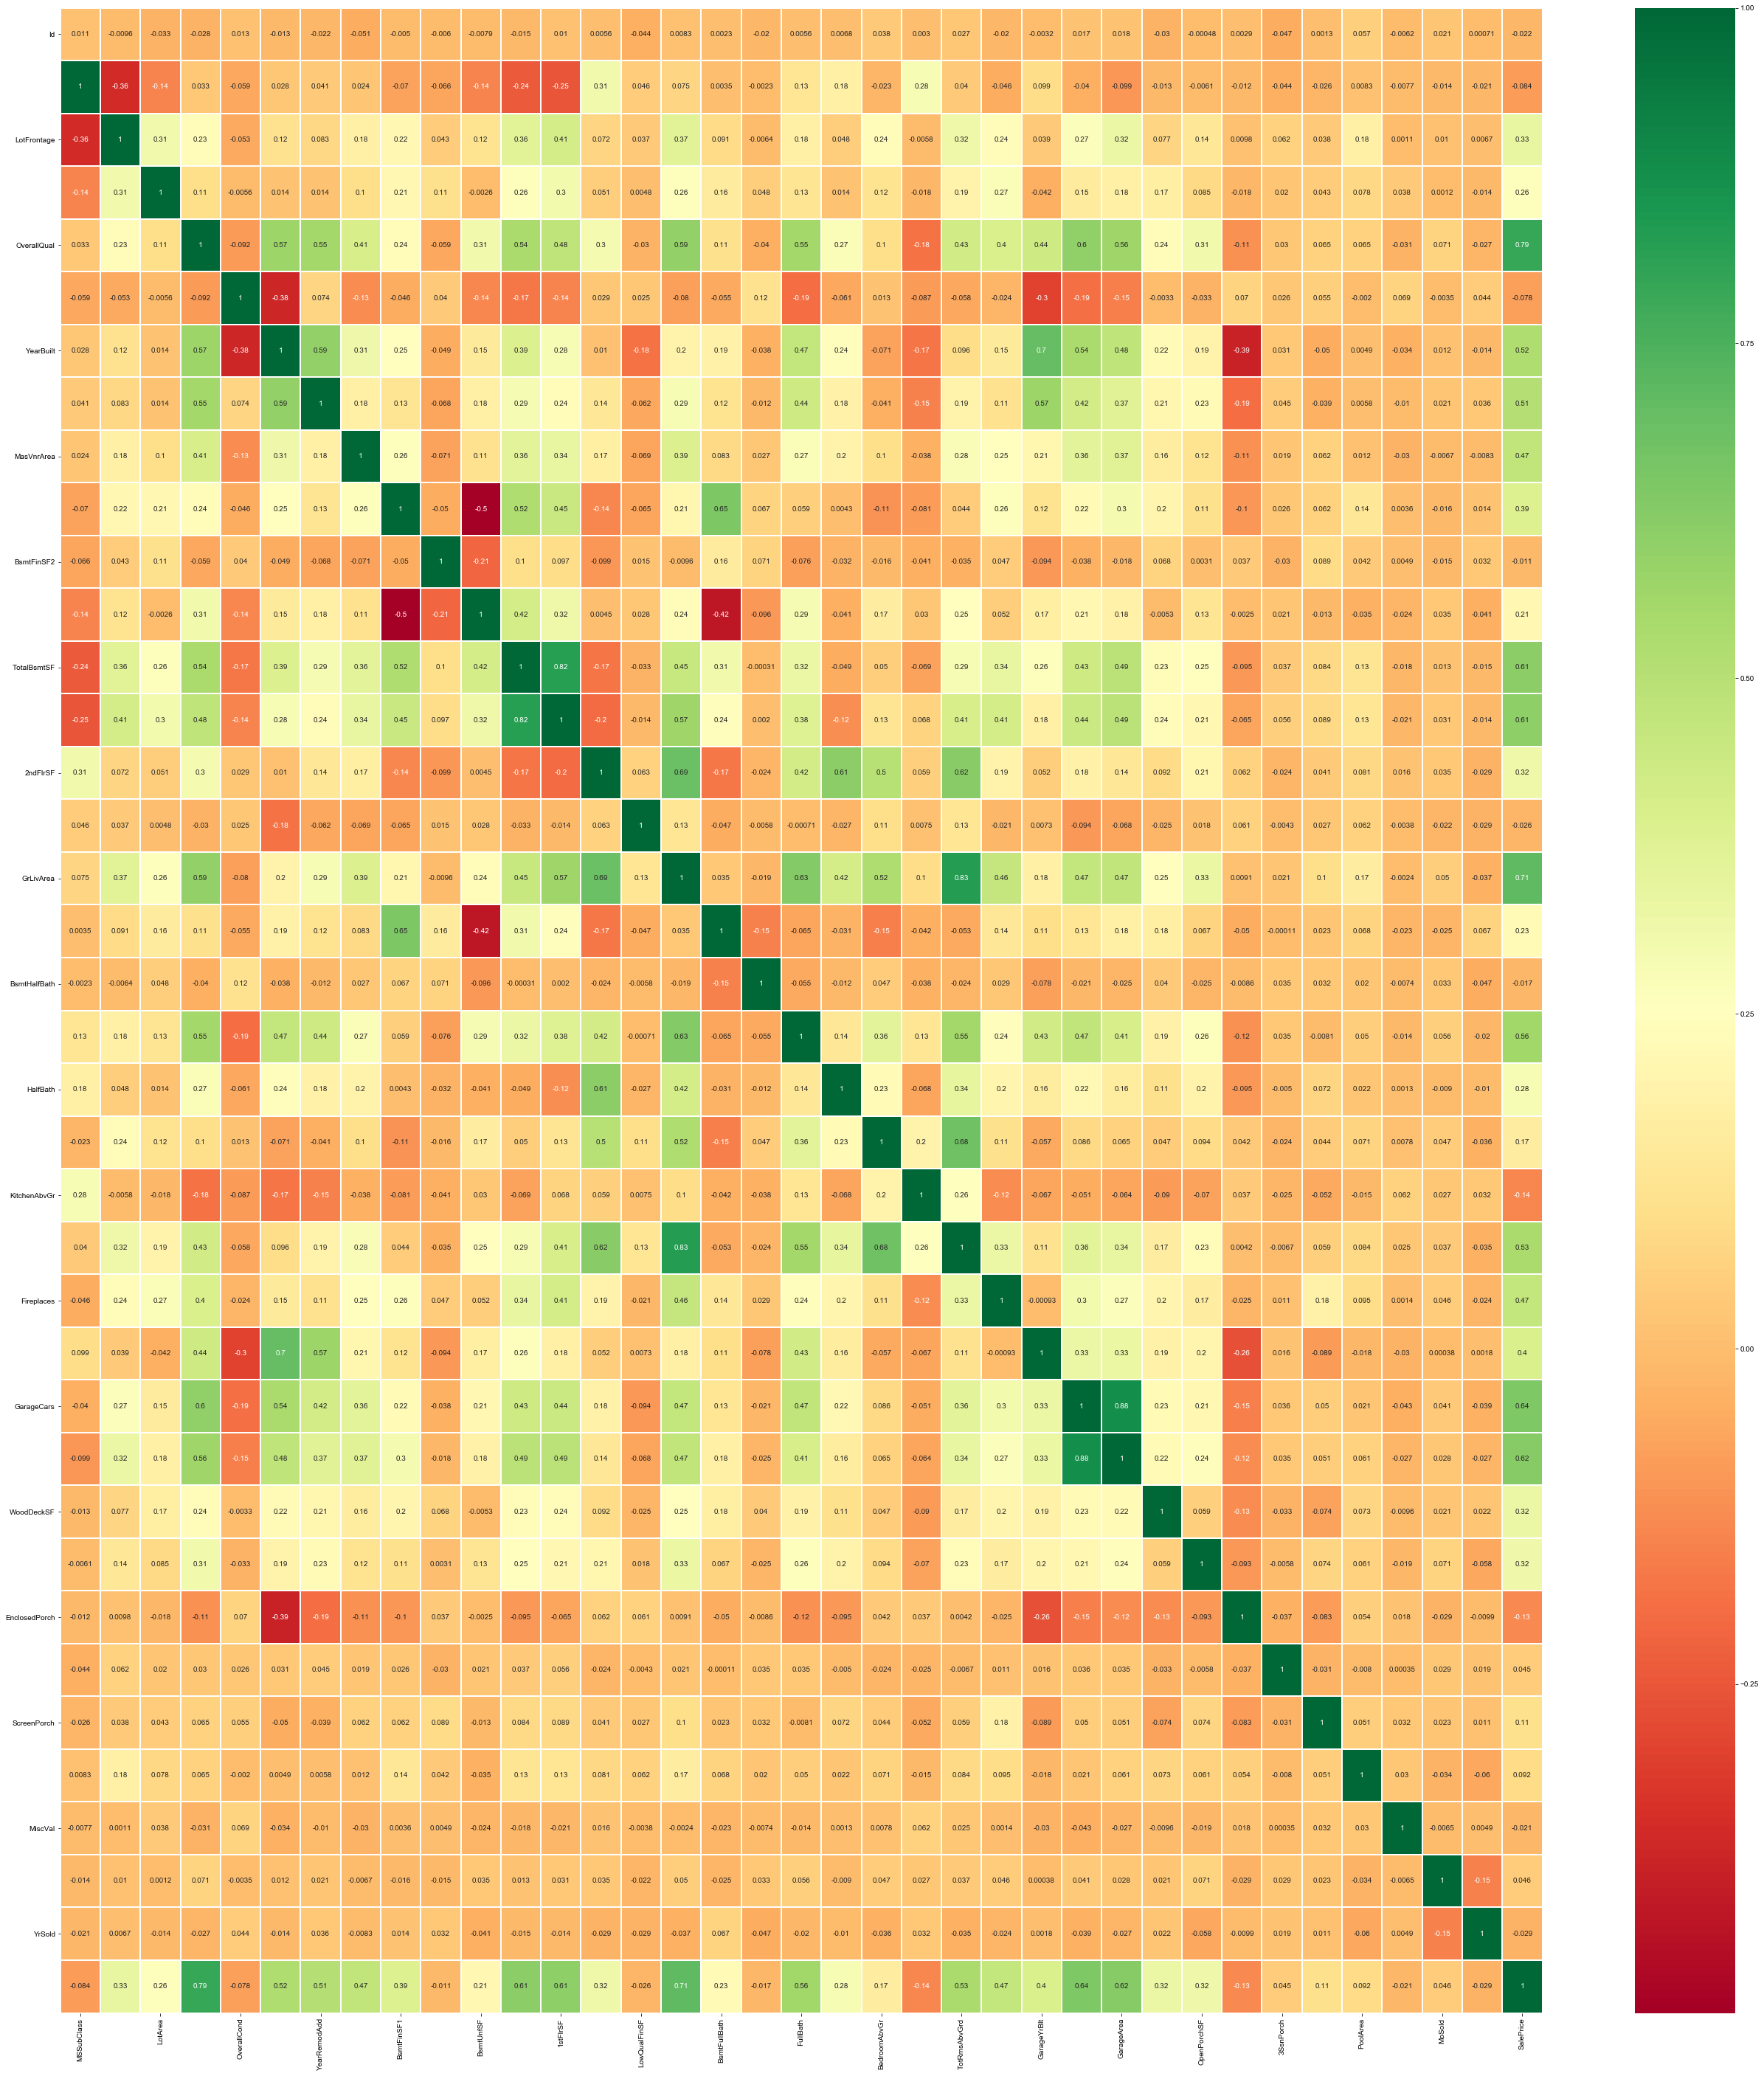

In [115]:
sns.heatmap(b,cmap="RdYlGn",linewidths=1,annot=True)
fig=plt.gcf()
fig.set_size_inches(45,50)
sns.set(font_scale=2)
plt.show()

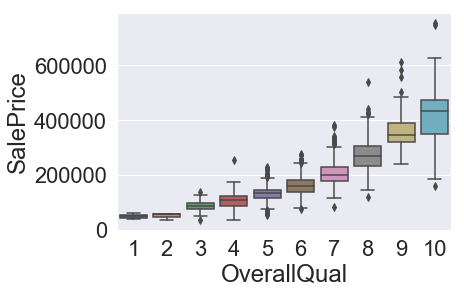

In [116]:
sns.boxplot(x="OverallQual",y="SalePrice",data=train)

In [117]:
np.corrcoef(train.OverallQual,train.SalePrice)

array([[1.       , 0.7909816],
       [0.7909816, 1.       ]])

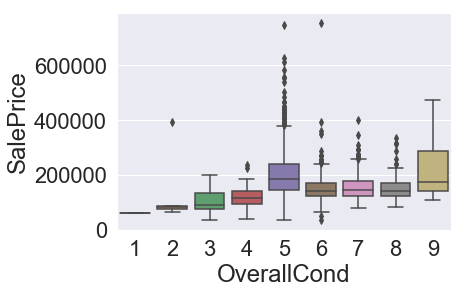

In [118]:
sns.boxplot(x="OverallCond",y="SalePrice",data=train)

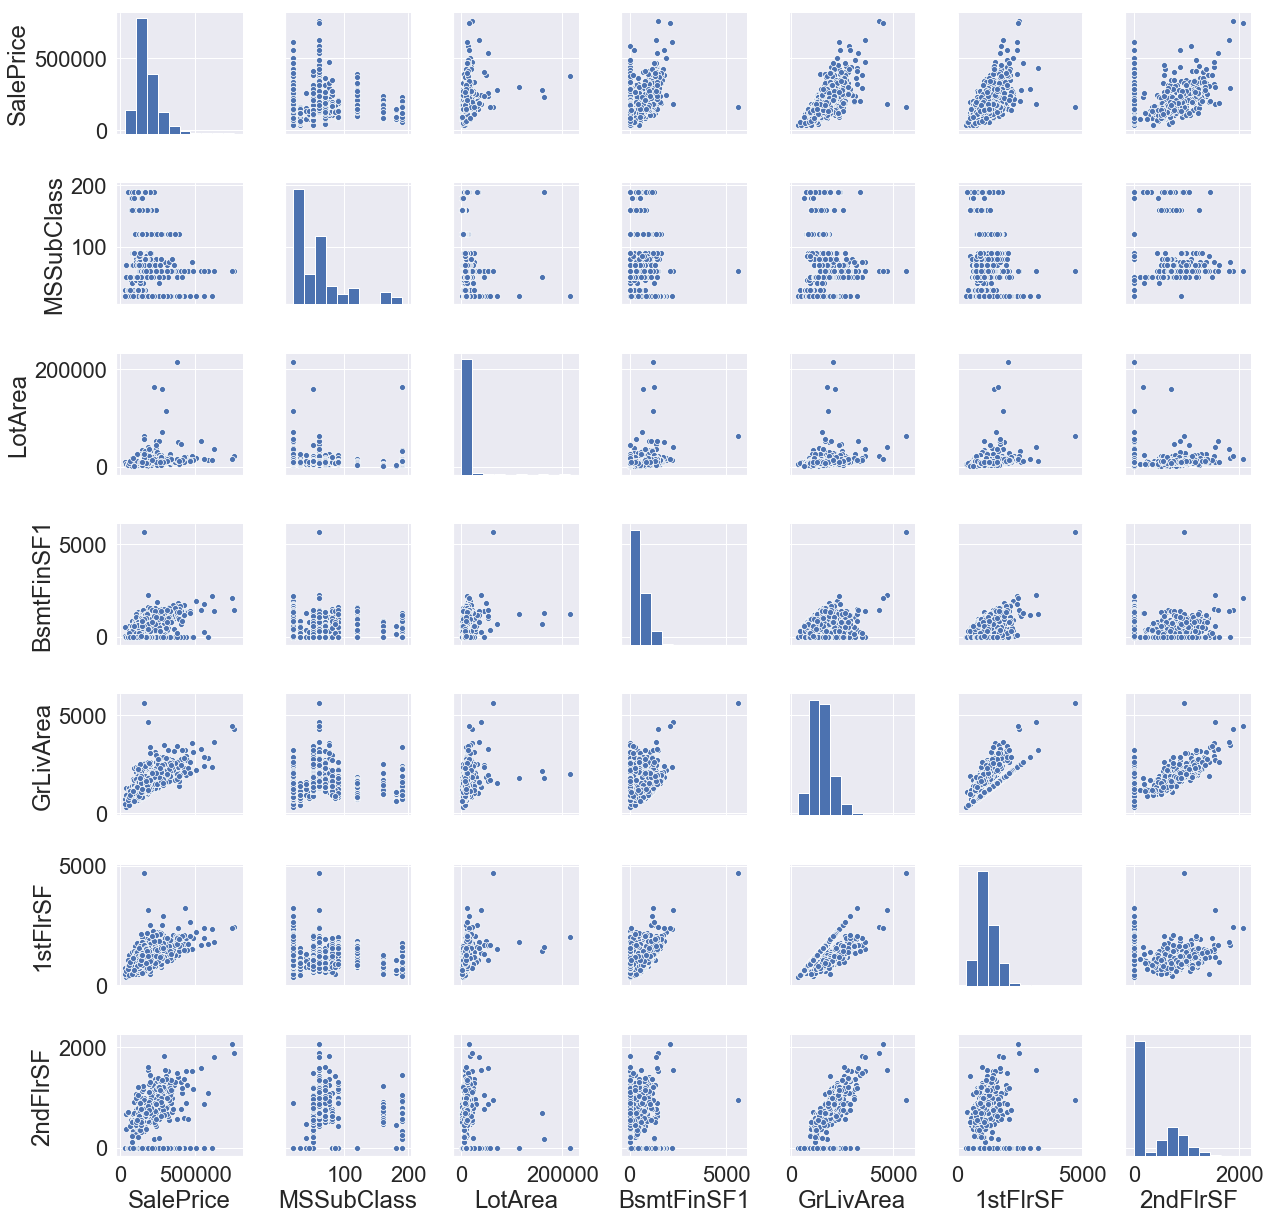

In [119]:
###pairplot is generally created on numerical columns


sns.pairplot(train[["SalePrice","MSSubClass","LotArea","BsmtFinSF1","GrLivArea","1stFlrSF","2ndFlrSF"]])

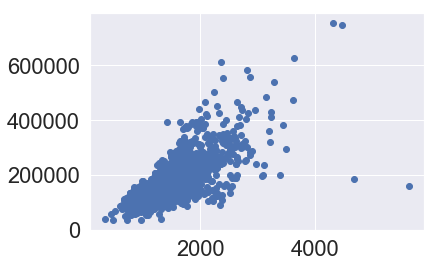

In [120]:
plt.scatter(train.GrLivArea,train.SalePrice)

In [121]:
np.corrcoef(train.GrLivArea,train.SalePrice)   ###correlation b/w area and price.

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

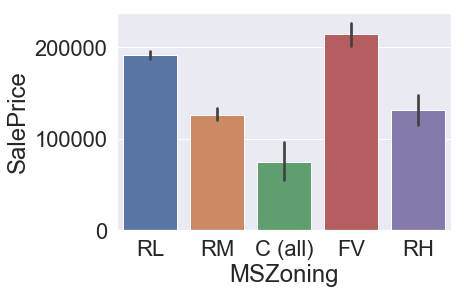

In [122]:
sns.barplot(x="MSZoning",y="SalePrice",data=train)

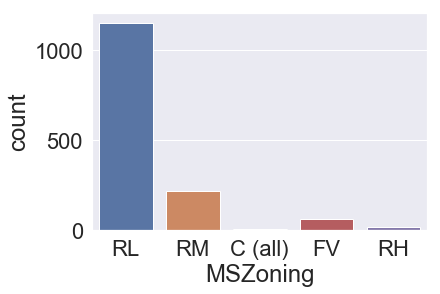

In [123]:
sns.countplot(x="MSZoning",data=train)

In [124]:
train.drop(["PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [125]:
test.drop(["PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [126]:
newtrain=train.drop(["Id","YearBuilt","YearRemodAdd","YrSold","GarageYrBlt","MoSold","Alley"],axis=1)

In [127]:
newtest=test.drop(["Id","YearBuilt","YearRemodAdd","YrSold","GarageYrBlt","MoSold","Alley"],axis=1)

In [128]:
ohe_train=pd.get_dummies(newtrain)
ohe_test=pd.get_dummies(newtest)

In [129]:
ohe_train.shape

(1460, 271)

In [130]:
ohe_test.shape

(1459, 254)

In [131]:
sc=StandardScaler()

In [132]:
scaled_train =pd.DataFrame(sc.fit_transform(ohe_train),columns=ohe_train.columns)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [133]:
scaled_test =pd.DataFrame(sc.fit_transform(ohe_test),columns=ohe_test.columns)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [134]:
scaled_test.shape

(1459, 254)

In [135]:
scaled_train.shape

(1460, 271)

In [137]:
y=scaled_train.SalePrice

In [138]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 169)

In [140]:
pc_train = pc.fit_transform(scaled_train) 
pc_test = pc.fit_transform(scaled_test)

In [141]:
pc_test.shape

(1459, 169)

In [142]:
pc_train.shape

(1460, 169)

In [144]:
pc.fit_transform(scaled_train)

array([[ 3.80705266,  1.74793959, -2.34882397, ...,  0.11453595,
        -0.14825373, -0.07717686],
       [ 0.10304559, -3.43122402, -0.56024515, ..., -1.26623926,
         1.06601502, -0.07231282],
       [ 4.70337811,  0.78734058, -1.70369942, ..., -0.50790251,
        -0.45919433, -0.2628927 ],
       ...,
       [ 1.58578014,  1.82883527,  2.14752161, ...,  0.48250332,
        -0.07762446, -1.16228359],
       [-3.13616908, -3.42214698, -0.6568891 , ..., -1.08246345,
        -0.1546443 , -0.87830996],
       [-1.17681033, -3.77839737, -1.35833022, ...,  0.75312406,
        -0.77577635,  0.25269453]])

In [145]:
np.cumsum(pc.explained_variance_ratio_)

array([0.0627321 , 0.09279102, 0.11728237, 0.13783662, 0.15520247,
       0.1719973 , 0.1866613 , 0.19995479, 0.21268285, 0.22446021,
       0.23579803, 0.24689005, 0.25760423, 0.2681372 , 0.27835891,
       0.28835542, 0.2982457 , 0.30770641, 0.31689618, 0.3259115 ,
       0.33479524, 0.34350919, 0.35207629, 0.36058946, 0.36882692,
       0.37695823, 0.38499256, 0.39299907, 0.40078425, 0.40851479,
       0.41616201, 0.42365884, 0.43105303, 0.43833227, 0.44544943,
       0.45253984, 0.4595647 , 0.46641463, 0.4731866 , 0.47978219,
       0.48635119, 0.49283939, 0.49929305, 0.50562008, 0.5118678 ,
       0.51801649, 0.52412789, 0.5301486 , 0.53608576, 0.54195043,
       0.54771396, 0.55340307, 0.5590351 , 0.56461868, 0.57015382,
       0.57560803, 0.58101697, 0.58636924, 0.59162674, 0.59682809,
       0.60196865, 0.60704886, 0.61207246, 0.61707463, 0.62204716,
       0.62698926, 0.6318193 , 0.63663351, 0.64137027, 0.64605007,
       0.6507014 , 0.65532961, 0.65993385, 0.66449826, 0.66905

In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [147]:
pred_lr = lr.fit(pc_train,y).predict(pc_test)

In [148]:
save= sc.fit_transform(pd.DataFrame(train.SalePrice))

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [149]:
sale = sc.inverse_transform(pred_lr)

In [152]:
solution = pd.DataFrame ({"ID":test.Id,"SalePrice":sale})

In [153]:
solution.to_csv("HousePrice LR Model.csv",index = False)

In [154]:
cd

C:\Users\Aditya


In [156]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [157]:
rf_pred = rf.fit(pc_train,y).predict(pc_test)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [158]:
sale = sc.inverse_transform(rf_pred)

In [159]:
solution = pd.DataFrame ({"ID":test.Id,"SalePrice":sale})

solution.to_csv("Houseprice RF model.csv",index = False)

In [160]:
cd

C:\Users\Aditya
